In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [4]:
dummy_df=df.drop(columns=['Loan_ID','Gender','Self_Employed','Property_Area',])

In [5]:
#drop rows with no values
dummy_df=dummy_df.dropna()

In [6]:
dummy_df.columns

Index(['Married', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status'],
      dtype='object')

In [7]:
x=dummy_df[['Married', 'Dependents', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
y=df['Loan_Status']

In [8]:
#get_dummy columns 
testdata=pd.get_dummies(dummy_df)

In [9]:
testdata.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Loan_Status_N',
       'Loan_Status_Y'],
      dtype='object')

In [10]:
x=testdata[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate']]

In [11]:
y=dummy_df['Loan_Status']
y.unique()

array(['N', 'Y'], dtype=object)

In [12]:
from sklearn.model_selection import  train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [14]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()

In [15]:
lreg.fit(X_train,y_train)

C:\Users\admin\Anaconda3\envs\Project403\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
print(f"Training Data Score: {lreg.score(X_train, y_train)}")
print(f"Testing Data Score: {lreg.score(X_test, y_test)}")

Training Data Score: 0.8116343490304709
Testing Data Score: 0.8269230769230769


In [17]:
pred=lreg.predict(X_test)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           N       0.86      0.52      0.65        48
           Y       0.82      0.96      0.89       108

    accuracy                           0.83       156
   macro avg       0.84      0.74      0.77       156
weighted avg       0.83      0.83      0.81       156



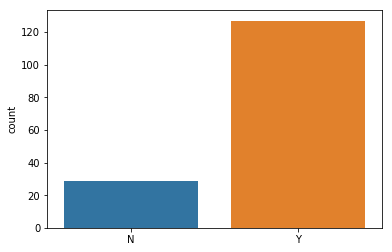

In [19]:
sns.countplot(pred)

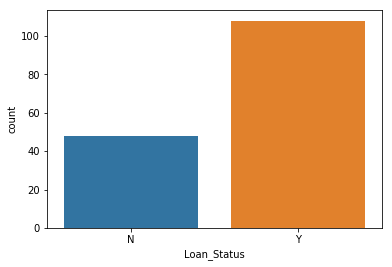

In [20]:
sns.countplot(y_test)

## True Negative , False Positive
## False Negative, True Postitive

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[ 25,  23],
       [  4, 104]], dtype=int64)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8269230769230769

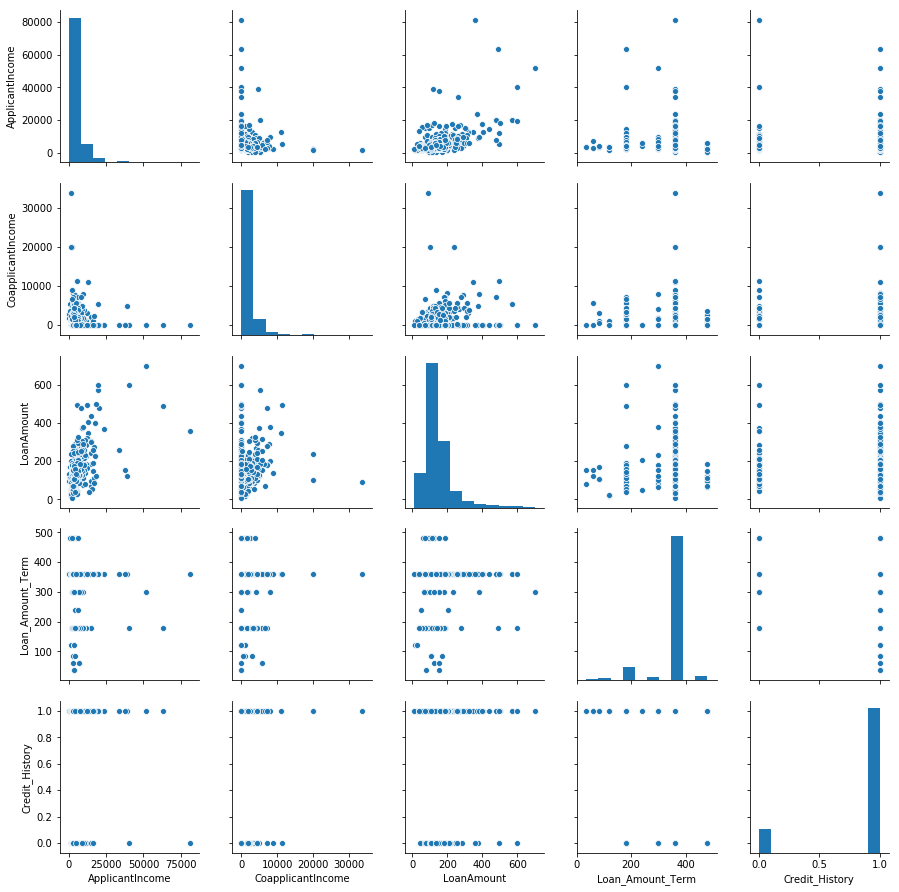

In [23]:
sns.pairplot(dummy_df)

C:\Users\admin\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


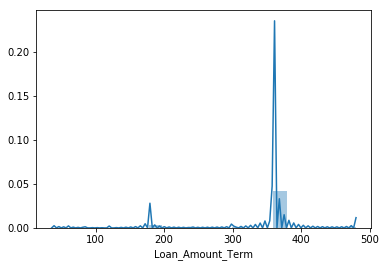

In [24]:
sns.distplot(dummy_df['Loan_Amount_Term'])

In [25]:
testdata['LoanAmount']

1      128.0
2       66.0
3      120.0
4      141.0
5      267.0
6       95.0
7      158.0
8      168.0
9      349.0
10      70.0
11     109.0
12     200.0
13     114.0
14      17.0
15     125.0
17      76.0
18     133.0
20     104.0
21     315.0
22     116.0
23     112.0
25     191.0
26     122.0
27     110.0
28      35.0
29     120.0
31      74.0
32     106.0
33     114.0
34     320.0
       ...  
580    205.0
581     90.0
582     36.0
584    146.0
585    172.0
586    104.0
587     70.0
588     94.0
589    106.0
590     56.0
591    205.0
592    292.0
593    142.0
594    260.0
595    110.0
596    187.0
598    180.0
599    192.0
601    155.0
602    128.0
603    172.0
604    496.0
606    173.0
607    157.0
608    108.0
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 517, dtype: float64

C:\Users\admin\AppData\Roaming\Python\Python36\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


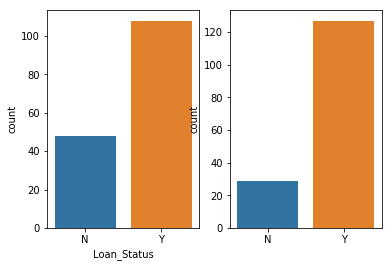

In [26]:
fig, ax =plt.subplots(1,2)
sns.countplot(y_test, ax=ax[0])
sns.countplot(pred, ax=ax[1])
fig.show()

In [27]:
y_test

373    N
109    Y
576    N
528    Y
98     Y
157    Y
424    Y
193    Y
292    Y
142    Y
246    Y
206    Y
242    Y
371    Y
540    Y
522    Y
389    Y
218    N
66     N
5      Y
21     Y
188    Y
3      Y
132    Y
268    N
584    N
456    Y
168    N
319    N
275    Y
      ..
474    Y
580    Y
308    N
511    Y
84     Y
310    Y
468    Y
311    Y
264    Y
341    N
399    N
53     N
46     Y
345    Y
369    N
353    N
495    Y
211    N
173    Y
247    Y
336    Y
64     N
90     Y
214    Y
61     Y
161    N
592    Y
234    Y
494    N
316    Y
Name: Loan_Status, Length: 156, dtype: object

In [28]:
pred

array(['N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y'],
      dtype=object)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
train_scores = []
test_scores = []
for k in range(1, 20, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
                        
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.641
k: 2, Train/Test Score: 0.814/0.526
k: 3, Train/Test Score: 0.778/0.660
k: 4, Train/Test Score: 0.740/0.654
k: 5, Train/Test Score: 0.756/0.667
k: 6, Train/Test Score: 0.734/0.641
k: 7, Train/Test Score: 0.726/0.660
k: 8, Train/Test Score: 0.723/0.660
k: 9, Train/Test Score: 0.717/0.699
k: 10, Train/Test Score: 0.709/0.673
k: 11, Train/Test Score: 0.706/0.705
k: 12, Train/Test Score: 0.695/0.724
k: 13, Train/Test Score: 0.701/0.724
k: 14, Train/Test Score: 0.695/0.705
k: 15, Train/Test Score: 0.698/0.724
k: 16, Train/Test Score: 0.695/0.724
k: 17, Train/Test Score: 0.693/0.712
k: 18, Train/Test Score: 0.690/0.712
k: 19, Train/Test Score: 0.690/0.699


In [40]:
print(test_scores)

[0.6410256410256411, 0.5256410256410257, 0.6602564102564102, 0.6538461538461539, 0.6666666666666666, 0.6410256410256411, 0.6602564102564102, 0.6602564102564102, 0.6987179487179487, 0.6730769230769231, 0.7051282051282052, 0.7243589743589743, 0.7243589743589743, 0.7051282051282052, 0.7243589743589743, 0.7243589743589743, 0.7115384615384616, 0.7115384615384616, 0.6987179487179487]


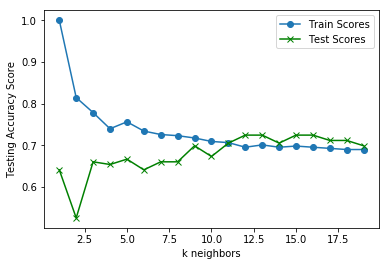

In [45]:
plt.plot(range(1, 20, 1), train_scores, marker='o',label='Train Scores')
plt.plot(range(1, 20, 1), test_scores, marker="x",label='Test Scores',color='g')
plt.xlabel("k neighbors")
plt.ylabel("Testing Accuracy Score")
plt.legend()
plt.savefig("Testing Accuracy Scores",dpi=300)
plt.show()